In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *

import pyspark.pandas as pd

In [0]:
spark = (SparkSession.builder.appName("GrpoupProj").getOrCreate())

In [0]:
#Load listings metadata

items_data = spark.read.format('json').option('inferSchema', 'true').load("s3://amazon-berkeley-objects/listings/metadata/")

In [0]:
items_data.printSchema()

root
 |-- 3dmodel_id: string (nullable = true)
 |-- brand: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- language_tag: string (nullable = true)
 |    |    |-- value: string (nullable = true)
 |-- bullet_point: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- language_tag: string (nullable = true)
 |    |    |-- value: string (nullable = true)
 |-- color: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- language_tag: string (nullable = true)
 |    |    |-- standardized_values: array (nullable = true)
 |    |    |    |-- element: string (containsNull = true)
 |    |    |-- value: string (nullable = true)
 |-- color_code: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- country: string (nullable = true)
 |-- domain_name: string (nullable = true)
 |-- fabric_type: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |

In [0]:

#display(items_data.select('brand', 'item_id', 'country', 'item_name', 'model_name', 'product_description','product_type', 'main_image_id').limit(20))
display(items_data.limit(2))

3dmodel_id brand bullet_point color color_code country domain_name fabric_type finish_type item_dimensions item_id item_keywords item_name item_shape item_weight main_image_id marketplace material model_name model_number model_year node other_image_id pattern product_description product_type spin_id style null List(List(en_IN, Amazon Brand - Solimo)) List(List(en_IN, 3D Printed Hard Back Case Mobile Cover for Asus Zenfone Max Pro M1 ZB601KL), List(en_IN, Easy to put & take off with perfect cutouts for volume buttons, audio & charging ports.), List(en_IN, Stylish design and appearance, express your unique personality.), List(en_IN, Extreme precision design allows easy access to all buttons and ports while featuring raised bezel to life screen and camera off flat surface.), List(en_IN, Slim Hard Back Cover), List(en_IN, No Warranty)) List(List(en_IN, List(multi-colored), Others)) null IN amazon.in null null null B07TBV5BY9 List(List(en_IN, mobile cover), List(en_IN, back cover), List(en_IN, mobile case), List(en_IN, phone case), List(en_IN, mobile panel), List(en_IN, phone panel), List(en_IN, Oppo mobile case), List(en_IN, Oppo phone cover), List(en_IN, Oppo back case), List(en_IN, hard case), List(en_IN, 3D printed mobile cover), List(en_IN, mobile cover), List(en_IN, back cover), List(en_IN, mobile case), List(en_IN, phone case), List(en_IN, mobile panel), List(en_IN, phone panel), List(en_IN, Asus mobile case), List(en_IN, Asus phone cover), List(en_IN, Asus back case), List(en_IN, Zenfone cases), List(en_IN, Zenfone cover), List(en_IN, mobile cover), List(en_IN, back cover), List(en_IN, mobile case), List(en_IN, phone case), List(en_IN, mobile panel), List(en_IN, phone panel), List(en_IN, Asus mobile case), List(en_IN, Asus phone cover), List(en_IN, Asus back case), List(en_IN, Zenfone cases), List(en_IN, Zenfone cover), List(en_IN, mobile cover), List(en_IN, back cover), List(en_IN, mobile case), List(en_IN, phone case), List(en_IN, mobile panel), List(en_IN, phone panel), List(en_IN, Asus mobile case), List(en_IN, Asus phone cover), List(en_IN, Asus back case), List(en_IN, Zenfone cases), List(en_IN, Zenfone cover), List(en_IN, mobile cover), List(en_IN, back cover), List(en_IN, mobile case), List(en_IN, phone case), List(en_IN, mobile panel), List(en_IN, phone panel), List(en_IN, Asus mobile case), List(en_IN, Asus phone cover), List(en_IN, Asus back case), List(en_IN, Zenfone cases), List(en_IN, Zenfone cover), List(en_IN, mobile cover), List(en_IN, back cover), List(en_IN, mobile case), List(en_IN, phone case), List(en_IN, mobile panel), List(en_IN, phone panel), List(en_IN, Asus mobile case), List(en_IN, Asus phone cover), List(en_IN, Asus back case), List(en_IN, Zenfone cases), List(en_IN, Zenfone cover), List(en_IN, mobile cover), List(en_IN, back cover), List(en_IN, mobile case), List(en_IN, phone case), List(en_IN, mobile panel), List(en_IN, phone panel), List(en_IN, Asus mobile case), List(en_IN, Asus phone cover), List(en_IN, Asus back case), List(en_IN, Zenfone cases), List(en_IN, Zenfone cover), List(en_IN, mobile cover), List(en_IN, back cover), List(en_IN, mobile case), List(en_IN, phone case), List(en_IN, mobile panel), List(en_IN, phone panel), List(en_IN, Asus mobile case), List(en_IN, Asus phone cover), List(en_IN, Asus back case), List(en_IN, Zenfone cases), List(en_IN, Zenfone cover), List(en_IN, mobile cover), List(en_IN, back cover), List(en_IN, mobile case), List(en_IN, phone case), List(en_IN, mobile panel), List(en_IN, phone panel), List(en_IN, Asus mobile case), List(en_IN, Asus phone cover), List(en_IN, Asus back case), List(en_IN, Zenfone cases), List(en_IN, Zenfone cover), List(en_IN, mobile cover), List(en_IN, back cover), List(en_IN, mobile case), List(en_IN, phone case), List(en_IN, mobile panel), List(en_IN, phone panel), List(en_IN, Asus mobile case), List(en_IN, Asus phone cover), List(en_IN, Asus back case), List(en_IN, Zenfone cases), List(en_IN, Zenfone cover), List(en_IN, mobile cover

In [0]:
#cache the data and check the number of records
#items_data.cache()
items_data.count()

Out[6]: 147702

In [0]:
#check distinct product types and count

#items_data.select(col('product_type')).groupBy('product_type').count().sort(col('count').desc()).show(20, truncate=False) #576 distinct product types
items_data.selectExpr('explode(product_type) as product_type1').groupBy('product_type1').count().sort(col('count').desc()).show(20, truncate=False)

+----------------------------+-----+
|product_type1               |count|
+----------------------------+-----+
|{CELLULAR_PHONE_CASE}       |64853|
|{SHOES}                     |12965|
|{GROCERY}                   |6546 |
|{HOME}                      |5264 |
|{HOME_BED_AND_BATH}         |3082 |
|{HOME_FURNITURE_AND_DECOR}  |2255 |
|{CHAIR}                     |2100 |
|{BOOT}                      |2009 |
|{SANDAL}                    |1845 |
|{FINERING}                  |1540 |
|{HEALTH_PERSONAL_CARE}      |1449 |
|{FINENECKLACEBRACELETANKLET}|1377 |
|{ACCESSORY}                 |1362 |
|{SOFA}                      |1199 |
|{OFFICE_PRODUCTS}           |1152 |
|{FINEEARRING}               |1137 |
|{PET_SUPPLIES}              |1064 |
|{SPORTING_GOODS}            |972  |
|{TABLE}                     |936  |
|{HARDWARE_HANDLE}           |860  |
+----------------------------+-----+
only showing top 20 rows



Columns to keep in the final gold table containing item listings:
- brand: array. language_tag and value/brand name
- bullet_point: array. Contains the product description
- color: array. language_tag, standardized_values contains list of colors, value is the colour
- country: string
- finish_type: array. language_tag, value
- item_dimensions: array
- item id: string
- item_keywords: array
- item name: array
- item weight: array normalized_value -dict, unit, value
- main_image_id
- model_name - array
- model number - array
- model year
- node - arrary. node_id, node_name - path of the item wrt to Amazon homepage
- other_image_id
- product_description: 143462 null values. language_tag, value
- product_type

In [0]:
#create new column product_type1 with the value. In this case product_type1 data type remains as struct

items_data.withColumn('product_type1', explode('product_type')).select('product_type','product_type1').printSchema()

root
 |-- product_type: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- value: string (nullable = true)
 |-- product_type1: struct (nullable = true)
 |    |-- value: string (nullable = true)



In [0]:
#create new column, select the value of the struct product_type1 and change the column name to product_type1
items_data.withColumn('product_type1', explode('product_type')).select('item_id','main_image_id','product_type',col('product_type1.value').alias('product_type1'))\
.show(5, truncate=False)
#.printSchema())
        #.limit(5))
        


+----------+-------------+-----------------------+-------------------+
|item_id   |main_image_id|product_type           |product_type1      |
+----------+-------------+-----------------------+-------------------+
|B07TBV5BY9|71hKkUIj9dL  |[{CELLULAR_PHONE_CASE}]|CELLULAR_PHONE_CASE|
|B08569WBKB|81WV4BcD4eL  |[{CELLULAR_PHONE_CASE}]|CELLULAR_PHONE_CASE|
|B0856BFDXG|61Ags309JuL  |[{CELLULAR_PHONE_CASE}]|CELLULAR_PHONE_CASE|
|B07TG4BHLT|71Xyg7CdUhL  |[{CELLULAR_PHONE_CASE}]|CELLULAR_PHONE_CASE|
|B07ZKZRXVL|61EyVCOCqqL  |[{CARGO_STRAP}]        |CARGO_STRAP        |
+----------+-------------+-----------------------+-------------------+
only showing top 5 rows



In [0]:
#value column will be of string type if seleceted this way

items_data.selectExpr("explode(product_type) as product_type1").selectExpr("product_type1.*").show(10, truncate=False)

+-------------------------+
|value                    |
+-------------------------+
|CELLULAR_PHONE_CASE      |
|CELLULAR_PHONE_CASE      |
|CELLULAR_PHONE_CASE      |
|CELLULAR_PHONE_CASE      |
|CARGO_STRAP              |
|CELLULAR_PHONE_CASE      |
|GROCERY                  |
|CELLULAR_PHONE_CASE      |
|PROTEIN_SUPPLEMENT_POWDER|
|CELLULAR_PHONE_CASE      |
+-------------------------+
only showing top 10 rows



In [0]:
#count of nulls for pattern and style columns
items_data.selectExpr('sum(int(isnull(pattern))) as nullPattern', 'sum(int(isnull(style))) as nullStyle' ).show()

+-----------+---------+
|nullPattern|nullStyle|
+-----------+---------+
|     143112|   104514|
+-----------+---------+



In [0]:
#check non null values
display(items_data.where(col('pattern').isNull()==False).select('pattern','style'))

pattern,style
"List(List(it_IT, tinta unita))","List(List(it_IT, Flat Sheet))"
"List(List(en_IN, Solid))","List(List(hi_IN, डर्बी), List(en_IN, Oxford))"
"List(List(nl_NL, effen), List(cs_CZ, jednobarevný), List(tr_TR, tek renkli), List(pl_PL, jednokolorowy), List(en_GB, Plain-Coloured), List(de_DE, Einfarbig))",null
"List(List(en_US, Bears))","List(List(en_US, 1 pack))"
"List(List(en_GB, Animal))","List(List(en_GB, Minimalist))"
"List(List(en_IN, Comforter))",null
"List(List(cs_CZ, Pruhované), List(de_DE, Gestreift))","List(List(nl_NL, dekbedset), List(cs_CZ, sada dek), List(pl_PL, zestaw kołder), List(de_DE, Duvet Set))"
"List(List(nl_NL, single))","List(List(nl_NL, AAA))"
"List(List(en_US, Geometric))","List(List(en_US, Contemporary), List(es_US, Contemporáneo), List(ar_AE, عصري))"
"List(List(en_IN, Solid))","List(List(en_IN, Derby))"


- items_df: subset of items_data containing 18 columns. 
- items_df1: contains cleaned columns appended with 1 or 2. example: product_type and cleaned column product_type1

In [0]:
#Create a new df with the required columns, cache it

items_df = items_data.select('brand','bullet_point','color','country','finish_type', 'item_dimensions','item_id','item_keywords','item_name',\
                            'item_weight','main_image_id','other_image_id','model_name','model_number','model_year','node','product_type',\
                            'product_description')
items_df.cache()
print(items_df.count())

147702


In [0]:
#Create new df items_df1 with new columns with unpacked values

#product type
items_df1 = items_df.withColumn('product_type1', explode('product_type')).selectExpr('*','product_type1.value').drop('product_type1').withColumnRenamed('value','product_type1')

#brand
items_df1 = items_df1.withColumn('brand_name1', col('brand.value')) 


#bullet_point is product description
items_df1 = items_df1.withColumns({'bullet_point1': col('bullet_point.value'), 'bullet_point1_lang': col('bullet_point.language_tag')})

#color= color1, color2, color1_lang
items_df1 = items_df1.withColumns({'color1': col('color.standardized_values'), 'color2': col('color.value'), \
                                           'color1_lang': col('color.language_tag')})

#finish_type
items_df1 = items_df1.withColumn('finish_type1', col('finish_type.value'))

#items_keywords
items_df1 = items_df1.withColumn('item_keywords1', col('item_keywords.value'))

#item_name
items_df1 = items_df1.withColumn('item_name1', col('item_name.value'))

#item_weight
items_df1 = items_df1.withColumn('item_weight1_norm', concat('item_weight.normalized_value.unit', 'item_weight.normalized_value.value'))
items_df1 = items_df1.withColumn('item_weight1', concat('item_weight.unit', 'item_weight.value'))

#model_name
items_df1 = items_df1.withColumn('model_name1', col('model_name.value'))

#model_numher
items_df1 = items_df1.withColumn('model_number1', col('model_number.value'))

#model_year
items_df1 = items_df1.withColumn('model_year1', explode_outer('model_year')) ##to include null values

#node
items_df1 = items_df1.withColumn('node_id1', col('node.node_id'))
items_df1 = items_df1.withColumn('node_name1', col('node.node_name'))

#product_description
items_df1 = items_df1.withColumn('product_desc_lang1', col('product_description.language_tag'))
items_df1 = items_df1.withColumn('product_description1', col('product_description.value'))

#item_dimensions
items_df1 = items_df1.withColumn('item_dim_height', \
                            concat_ws(' ', 'item_dimensions.height.normalized_value.value', 'item_dimensions.height.normalized_value.unit'))
items_df1 = items_df1.withColumn('item_dim_length', \
                                 concat_ws(' ', 'item_dimensions.length.normalized_value.value','item_dimensions.length.normalized_value.unit'))
items_df1 = items_df1.withColumn('item_dim_width', \
                                 concat_ws(' ', 'item_dimensions.width.normalized_value.value', 'item_dimensions.width.normalized_value.unit'))

Access elements of a list in a column like these :
 - items_df1.select(items_df1.bullet_point1[0], items_df1.bullet_point1[1]).show(2, truncate=False)
 - items_df1.select(items_df1.bullet_point1.getItem(1)).show(5, truncate=False)

In [0]:
#items_df1.count()
display(items_df1.limit(10))

brand bullet_point color country finish_type item_dimensions item_id item_keywords item_name item_weight main_image_id other_image_id model_name model_number model_year node product_type product_description product_type1 brand_name1 bullet_point1 bullet_point1_lang color1 color2 color1_lang finish_type1 item_keywords1 item_name1 item_weight1_norm item_weight1 model_name1 model_number1 model_year1 node_id1 node_name1 product_desc_lang1 product_description1 item_dim_height item_dim_length item_dim_width List(List(en_IN, Amazon Brand - Solimo)) List(List(en_IN, 3D Printed Hard Back Case Mobile Cover for Asus Zenfone Max Pro M1 ZB601KL), List(en_IN, Easy to put & take off with perfect cutouts for volume buttons, audio & charging ports.), List(en_IN, Stylish design and appearance, express your unique personality.), List(en_IN, Extreme precision design allows easy access to all buttons and ports while featuring raised bezel to life screen and camera off flat surface.), List(en_IN, Slim Hard Back Cover), List(en_IN, No Warranty)) List(List(en_IN, List(multi-colored), Others)) IN null null B07TBV5BY9 List(List(en_IN, mobile cover), List(en_IN, back cover), List(en_IN, mobile case), List(en_IN, phone case), List(en_IN, mobile panel), List(en_IN, phone panel), List(en_IN, Oppo mobile case), List(en_IN, Oppo phone cover), List(en_IN, Oppo back case), List(en_IN, hard case), List(en_IN, 3D printed mobile cover), List(en_IN, mobile cover), List(en_IN, back cover), List(en_IN, mobile case), List(en_IN, phone case), List(en_IN, mobile panel), List(en_IN, phone panel), List(en_IN, Asus mobile case), List(en_IN, Asus phone cover), List(en_IN, Asus back case), List(en_IN, Zenfone cases), List(en_IN, Zenfone cover), List(en_IN, mobile cover), List(en_IN, back cover), List(en_IN, mobile case), List(en_IN, phone case), List(en_IN, mobile panel), List(en_IN, phone panel), List(en_IN, Asus mobile case), List(en_IN, Asus phone cover), List(en_IN, Asus back case), List(en_IN, Zenfone cases), List(en_IN, Zenfone cover), List(en_IN, mobile cover), List(en_IN, back cover), List(en_IN, mobile case), List(en_IN, phone case), List(en_IN, mobile panel), List(en_IN, phone panel), List(en_IN, Asus mobile case), List(en_IN, Asus phone cover), List(en_IN, Asus back case), List(en_IN, Zenfone cases), List(en_IN, Zenfone cover), List(en_IN, mobile cover), List(en_IN, back cover), List(en_IN, mobile case), List(en_IN, phone case), List(en_IN, mobile panel), List(en_IN, phone panel), List(en_IN, Asus mobile case), List(en_IN, Asus phone cover), List(en_IN, Asus back case), List(en_IN, Zenfone cases), List(en_IN, Zenfone cover), List(en_IN, mobile cover), List(en_IN, back cover), List(en_IN, mobile case), List(en_IN, phone case), List(en_IN, mobile panel), List(en_IN, phone panel), List(en_IN, Asus mobile case), List(en_IN, Asus phone cover), List(en_IN, Asus back case), List(en_IN, Zenfone cases), List(en_IN, Zenfone cover), List(en_IN, mobile cover), List(en_IN, back cover), List(en_IN, mobile case), List(en_IN, phone case), List(en_IN, mobile panel), List(en_IN, phone panel), List(en_IN, Asus mobile case), List(en_IN, Asus phone cover), List(en_IN, Asus back case), List(en_IN, Zenfone cases), List(en_IN, Zenfone cover), List(en_IN, mobile cover), List(en_IN, back cover), List(en_IN, mobile case), List(en_IN, phone case), List(en_IN, mobile panel), List(en_IN, phone panel), List(en_IN, Asus mobile case), List(en_IN, Asus phone cover), List(en_IN, Asus back case), List(en_IN, Zenfone cases), List(en_IN, Zenfone cover), List(en_IN, mobile cover), List(en_IN, back cover), List(en_IN, mobile case), List(en_IN, phone case), List(en_IN, mobile panel), List(en_IN, phone panel), List(en_IN, Asus mobile case), List(en_IN, Asus phone cover), List(en_IN, Asus back case), List(en_IN, Zenfone cases), List(en_IN, Zenfone cover), List(en_IN, mobile cover), List(en_IN, back cover), List(en_IN, mobile case), List(en_IN, phone case), List(en_IN, mobile panel), List(en_IN, phone pane

- country: contains 2 letter country abbrevations. 20 distinct countries
- finish_type : 319 distinct finish types. 146166 records have null finish types
- item_dimensions: 
- item_keywords: language_tag and value - maybe in this case we won't keep language_tag
- item_name: value
- item_weight: unit and value. Can also keep normalized_value:unit & value
- model_name
- model_number
- model_year: 17 distinct values incl null
- node: node_id1, node_name1
- other_image_id:

In [0]:
items_df1.select('country').distinct().count()

Out[40]: 20

In [0]:
items_df1.select('finish_type').distinct().count() #.show(truncate=False)

Out[43]: 319

In [0]:
#records with finish type value as null
items_df1.selectExpr('sum(int(isnull(finish_type))) as null_finishtype').show()

+---------------+
|null_finishtype|
+---------------+
|         146166|
+---------------+



In [0]:
#non null finish type values

items_df1.select('finish_type').where(col('finish_type').isNotNull()).show(truncate=False)

+--------------------------------------------+
|finish_type                                 |
+--------------------------------------------+
|[{en_US, antiqued}]                         |
|[{en_US, black}]                            |
|[{en_US, polished}]                         |
|[{en_US, Polished}]                         |
|[{en_IN, Enameled}]                         |
|[{es_ES, Matte}]                            |
|[{it_IT, Lucidato}]                         |
|[{en_US, Brushed}]                          |
|[{es_MX, Cromo}]                            |
|[{es_ES, Barniz}]                           |
|[{en_US, Brushed}]                          |
|[{en_US, gold}, {es_US, Oro}, {de_DE, Gold}]|
|[{en_GB, Satin Nickel}]                     |
|[{en_US, matte}]                            |
|[{en_US, matte}]                            |
|[{en_US, Walnut veneer}]                    |
|[{en_US, white}]                            |
|[{en_GB, Melamine}]                         |
|[{en_US, oil

In [0]:
#non null product description values

#items_df1.selectExpr('sum(int(isnull(product_description))) as null_description').show() #143462
display(items_df1.where(col('product_description').isNotNull()).select('product_description').limit(5))

product_description
"List(List(en_SG, Solimo Whey Protein and Creatine Blend contains 32g protein and a 2.6g blend of BCAAs (Branched Chain Amino Acids) plus creatine per serving. To enjoy, shake, blend or mix with cold water, milk, non-dairy milks or smoothies.))"
"List(List(es_ES, Eono Essentials es una marca de Amazon con fabricantes externos autorizados. Consulta los detalles sobre el fabricante en el empaquetado del producto.), List(pt_PT, Eono Essentials é uma marca da Amazon com fabricantes terceirizados licenciados. Consulte os detalhes do fabricante na embalagem do produto.))"
"List(List(en_CA, Allover quilting and a cap toe lend classic appeal to this side stretch, stacked heel style))"
"List(List(it_IT, Eono))"
"List(List(fr_FR, Le portefeuille classique se présente de manière contemporaine avec un nombre correspondant de fentes pour cartes, une poche double et une poche à monnaie. Ce portefeuille est petit, ultra-plat et protégé par RFID. Eono portefeuille est fait de cuir de vachette de haute qualité. Les compartiments à billets et à pièces offrent au sac assez d’espace pour tout le nécessaire. Eono portefeuille à main sont fabriqués à partir de matériaux de qualité contrôlée, traités avec la plus grande précision et dans le souci de la longévité. Nous voulions le rendre assez petit et en même temps très résistant, avec une taille de 10X8,0 cm. Ce portefeuille en cuir est parfait pour les traditionalistes élégants avec le goût du luxe et de l'artisanat. Cette bourse est idéale comme cadeau pour toute occasion, par exemple. Anniversaire, pâques, noël, fête des pères, saint valentin, etc.))"


items_df1 - keep only the cleaned columns, drop the rest

In [0]:
#drop the following columns
cols = ("brand",'bullet_point','color', 'finish_type', 'item_keywords','item_name','item_weight','model_name','model_number','model_year','node', 'product_type', 'product_description', 'item_dimensions')

items_df1 = items_df1.drop(*cols)

In [0]:
#keep only value to change from struct type
items_df1 = items_df1.withColumn('model_year1', col('model_year1.value'))

In [0]:
items_df1.printSchema()

root
 |-- country: string (nullable = true)
 |-- item_id: string (nullable = true)
 |-- main_image_id: string (nullable = true)
 |-- other_image_id: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- product_type1: string (nullable = true)
 |-- brand_name1: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- bullet_point1: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- bullet_point1_lang: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- color1: array (nullable = true)
 |    |-- element: array (containsNull = true)
 |    |    |-- element: string (containsNull = true)
 |-- color2: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- color1_lang: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- finish_type1: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- item_keywords1: array (nullable = true)
 |    |

In [0]:
display(items_df1.limit(10))

country,item_id,main_image_id,other_image_id,product_type1,brand_name1,bullet_point1,bullet_point1_lang,color1,color2,color1_lang,finish_type1,item_keywords1,item_name1,item_weight1_norm,item_weight1,model_name1,model_number1,model_year1,node_id1,node_name1,product_desc_lang1,product_description1,item_dim_height,item_dim_length,item_dim_width
IN,B07TBV5BY9,71hKkUIj9dL,"List(61oI69Yt4GL, 811HRaF0oOL, 61ATVyzpLKL, 61Xce1Hq7DL)",CELLULAR_PHONE_CASE,List(Amazon Brand - Solimo),"List(3D Printed Hard Back Case Mobile Cover for Asus Zenfone Max Pro M1 ZB601KL, Easy to put & take off with perfect cutouts for volume buttons, audio & charging ports., Stylish design and appearance, express your unique personality., Extreme precision design allows easy access to all buttons and ports while featuring raised bezel to life screen and camera off flat surface., Slim Hard Back Cover, No Warranty)","List(en_IN, en_IN, en_IN, en_IN, en_IN, en_IN)",List(List(multi-colored)),List(Others),List(en_IN),null,"List(mobile cover, back cover, mobile case, phone case, mobile panel, phone panel, Oppo mobile case, Oppo phone cover, Oppo back case, hard case, 3D printed mobile cover, mobile cover, back cover, mobile case, phone case, mobile panel, phone panel, Asus mobile case, Asus phone cover, Asus back case, Zenfone cases, Zenfone cover, mobile cover, back cover, mobile case, phone case, mobile panel, phone panel, Asus mobile case, Asus phone cover, Asus back case, Zenfone cases, Zenfone cover, mobile cover, back cover, mobile case, phone case, mobile panel, phone panel, Asus mobile case, Asus phone cover, Asus back case, Zenfone cases, Zenfone cover, mobile cover, back cover, mobile case, phone case, mobile panel, phone panel, Asus mobile case, Asus phone cover, Asus back case, Zenfone cases, Zenfone cover, mobile cover, back cover, mobile case, phone case, mobile panel, phone panel, Asus mobile case, Asus phone cover, Asus back case, Zenfone cases, Zenfone cover, mobile cover, back cover, mobile case, phone case, mobile panel, phone panel, Asus mobile case, Asus phone cover, Asus back case, Zenfone cases, Zenfone cover, mobile cover, back cover, mobile case, phone case, mobile panel, phone panel, Asus mobile case, Asus phone cover, Asus back case, Zenfone cases, Zenfone cover, mobile cover, back cover, mobile case, phone case, mobile panel, phone panel, Asus mobile case, Asus phone cover, Asus back case, Zenfone cases, Zenfone cover, mobile cover, back cover, mobile case, phone case, mobile panel, phone panel, Asus mobile case, Asus phone cover, Asus back case, Zenfone cases, Zenfone cover, mobile cover, back cover, mobile case, phone case, mobile panel, phone panel, Asus mobile case, Asus phone cover, Asus back case, Zenfone cases, Zenfone cover, mobile cover, back cover, mobile case, phone case, mobile panel, phone panel, Asus mobile case, Asus phone cover, Asus back case, Zenfone cases, Zenfone cover, mobile cover, back cover, mobile case, phone case, mobile panel, phone panel, Asus mobile case, Asus phone cover, Asus back case, Zenfone cases, Zenfone cover, mobile cover, back cover, mobile case, phone case, mobile panel, phone panel, Asus mobile case, Asus phone cover, Asus back case, Zenfone cases, Zenfone cover, mobile cover, back cover, mobile case, phone case, mobile panel, phone panel, Asus mobile case, Asus phone cover, Asus back case, Zenfone cases, Zenfone cover)",List(Amazon Brand - Solimo Designer No 3D Printed Hard Back Case Mobile Cover for Asus Zenfone Max Pro M1 ZB601KL),"List(pounds, 0.110231131)","List(grams, 50.0)",List(Asus Zenfone Max Pro M1 ZB601KL),List(gz8595-SL40571),null,List(12710103031),List(/Categories/Mobiles & Accessories/Mobile Accessories/Cases & Covers/Back & Bumper Cases),null,null,,,
IN,B08569WBKB,81WV4BcD4eL,"List(51wiRu6gT9L, 81aF7rt7sYL, 51DEYNWtfsL, 518RypAtk8L)",CELLULAR_PHONE_CASE,List(Amazon Brand - Solimo),"List(Snug fit for Samsung Galaxy A51, with perfect cut-outs for volume buttons, audio and charging port

In [0]:
#columns that are of array data type

array_cols = []
for col in items_df1.dtypes:
    if('array' in col[1]):
        #print(col[0], ':', col[1])
        array_cols.append(col[0])
print(array_cols)

['other_image_id', 'brand_name1', 'bullet_point1', 'bullet_point1_lang', 'color1', 'color2', 'color1_lang', 'finish_type1', 'item_keywords1', 'item_name1', 'item_weight1_norm', 'item_weight1', 'model_name1', 'model_number1', 'node_id1', 'node_name1', 'product_desc_lang1', 'product_description1']


- All columns in items_df1 are string, array, or int. We will convert the above columns with array type to string
- Rename columns (remove 1 from the names)

In [0]:
#color1 is double array. extract the first two items for color1 and color1_lang
items_df1 = items_df1.withColumns({'color1' : concat_ws(',', items_df1.color1.getItem(0), items_df1.color1.getItem(1)),\
             'color1_lang': concat_ws(',', items_df1.color1_lang.getItem(0), items_df1.color1_lang.getItem(1))})

In [0]:
#convert columns with array type to string

items_df1 = items_df1.withColumns({'other_image_id': array_join('other_image_id', ','), 'brand_name1': array_join('brand_name1', ','),
                      'bullet_point1' : array_join('bullet_point1', ','), 'bullet_point1_lang' : array_join('bullet_point1_lang', ','),
                      'color2' : array_join('color2', ','), 'finish_type1' : array_join('finish_type1', ','), 
                      'item_keywords1' : array_join('item_keywords1', ','), 'item_name1' : array_join('item_name1', ','),
                     'item_weight1_norm' : array_join('item_weight1_norm', ',') })

items_df1 = items_df1.withColumns({'item_weight1': array_join('item_weight1', ','), 'model_name1': array_join('model_name1', ','),
                      'model_number1' : array_join('model_number1', ','), 'node_id1' : array_join('node_id1', ','),
                      'node_name1' : array_join('node_name1', ','), 'product_desc_lang1' : array_join('product_desc_lang1', ','), 
                      'product_description1' : array_join('product_description1', ',')})

In [0]:
#all columns are string or int

items_df1.printSchema()

root
 |-- country: string (nullable = true)
 |-- item_id: string (nullable = true)
 |-- main_image_id: string (nullable = true)
 |-- other_image_id: string (nullable = true)
 |-- product_type1: string (nullable = true)
 |-- brand_name1: string (nullable = true)
 |-- bullet_point1: string (nullable = true)
 |-- bullet_point1_lang: string (nullable = true)
 |-- color1: string (nullable = false)
 |-- color2: string (nullable = true)
 |-- color1_lang: string (nullable = false)
 |-- finish_type1: string (nullable = true)
 |-- item_keywords1: string (nullable = true)
 |-- item_name1: string (nullable = true)
 |-- item_weight1_norm: string (nullable = true)
 |-- item_weight1: string (nullable = true)
 |-- model_name1: string (nullable = true)
 |-- model_number1: string (nullable = true)
 |-- model_year1: long (nullable = true)
 |-- node_id1: string (nullable = true)
 |-- node_name1: string (nullable = true)
 |-- product_desc_lang1: string (nullable = true)
 |-- product_description1: string (n

In [0]:
print(items_df1.columns)

['country', 'item_id', 'main_image_id', 'other_image_id', 'product_type1', 'brand_name1', 'bullet_point1', 'bullet_point1_lang', 'color1', 'color2', 'color1_lang', 'finish_type1', 'item_keywords1', 'item_name1', 'item_weight1_norm', 'item_weight1', 'model_name1', 'model_number1', 'model_year1', 'node_id1', 'node_name1', 'product_desc_lang1', 'product_description1', 'item_dim_height', 'item_dim_length', 'item_dim_width']


In [0]:
#rename column names
new_cols = ['country', 'item_id', 'main_image_id', 'other_image_id', 'product_type', 'brand_name', 'bullet_point', 'bullet_point_lang', 'color1', 'color2', 'color1_lang', 'finish_type', 'item_keywords', 'item_name', 'item_weight_norm', 'item_weight', 'model_name', 'model_number', 'model_year', 'node_id', 'node_name', 'product_desc_lang', 'product_description', 'item_dim_height', 'item_dim_length', 'item_dim_width']

items_df1 = items_df1.toDF(*new_cols)

In [0]:
items_df1.printSchema()

root
 |-- country: string (nullable = true)
 |-- item_id: string (nullable = true)
 |-- main_image_id: string (nullable = true)
 |-- other_image_id: string (nullable = true)
 |-- product_type: string (nullable = true)
 |-- brand_name: string (nullable = true)
 |-- bullet_point: string (nullable = true)
 |-- bullet_point_lang: string (nullable = true)
 |-- color1: string (nullable = false)
 |-- color2: string (nullable = true)
 |-- color1_lang: string (nullable = false)
 |-- finish_type: string (nullable = true)
 |-- item_keywords: string (nullable = true)
 |-- item_name: string (nullable = true)
 |-- item_weight_norm: string (nullable = true)
 |-- item_weight: string (nullable = true)
 |-- model_name: string (nullable = true)
 |-- model_number: string (nullable = true)
 |-- model_year: long (nullable = true)
 |-- node_id: string (nullable = true)
 |-- node_name: string (nullable = true)
 |-- product_desc_lang: string (nullable = true)
 |-- product_description: string (nullable = true)


#### Save dataframe as delta lake table which will be used by downstream systems for analytics/reporting

In [0]:
#save table as delta lake format. this is the cleaned gold table.

items_df1.write.format('delta').mode('overwrite').save('/tmp/items_data_gold.delta')

In [0]:
dbutils.fs.ls ('/tmp/')

Out[191]: [FileInfo(path='dbfs:/tmp/diamonds_lrmodel/', name='diamonds_lrmodel/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/tmp/farmMarket/', name='farmMarket/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/tmp/farmzip_model/', name='farmzip_model/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/tmp/hive/', name='hive/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/tmp/items_data_gold.delta/', name='items_data_gold.delta/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/tmp/parquet/', name='parquet/', size=0, modificationTime=0)]

In [0]:
#reload the delta table

items_data_gold = spark.read.format("delta").load('/tmp/items_data_gold.delta')
display(items_data_gold.limit(5))

country,item_id,main_image_id,other_image_id,product_type,brand_name,bullet_point,bullet_point_lang,color1,color2,color1_lang,finish_type,item_keywords,item_name,item_weight_norm,item_weight,model_name,model_number,model_year,node_id,node_name,product_desc_lang,product_description,item_dim_height,item_dim_length,item_dim_width
IN,B07TBV5BY9,71hKkUIj9dL,"61oI69Yt4GL,811HRaF0oOL,61ATVyzpLKL,61Xce1Hq7DL",CELLULAR_PHONE_CASE,Amazon Brand - Solimo,"3D Printed Hard Back Case Mobile Cover for Asus Zenfone Max Pro M1 ZB601KL,Easy to put & take off with perfect cutouts for volume buttons, audio & charging ports.,Stylish design and appearance, express your unique personality.,Extreme precision design allows easy access to all buttons and ports while featuring raised bezel to life screen and camera off flat surface.,Slim Hard Back Cover,No Warranty","en_IN,en_IN,en_IN,en_IN,en_IN,en_IN",multi-colored,Others,en_IN,null,"mobile cover,back cover,mobile case,phone case,mobile panel,phone panel,Oppo mobile case,Oppo phone cover,Oppo back case,hard case,3D printed mobile cover,mobile cover,back cover,mobile case,phone case,mobile panel,phone panel,Asus mobile case,Asus phone cover,Asus back case,Zenfone cases,Zenfone cover,mobile cover,back cover,mobile case,phone case,mobile panel,phone panel,Asus mobile case,Asus phone cover,Asus back case,Zenfone cases,Zenfone cover,mobile cover,back cover,mobile case,phone case,mobile panel,phone panel,Asus mobile case,Asus phone cover,Asus back case,Zenfone cases,Zenfone cover,mobile cover,back cover,mobile case,phone case,mobile panel,phone panel,Asus mobile case,Asus phone cover,Asus back case,Zenfone cases,Zenfone cover,mobile cover,back cover,mobile case,phone case,mobile panel,phone panel,Asus mobile case,Asus phone cover,Asus back case,Zenfone cases,Zenfone cover,mobile cover,back cover,mobile case,phone case,mobile panel,phone panel,Asus mobile case,Asus phone cover,Asus back case,Zenfone cases,Zenfone cover,mobile cover,back cover,mobile case,phone case,mobile panel,phone panel,Asus mobile case,Asus phone cover,Asus back case,Zenfone cases,Zenfone cover,mobile cover,back cover,mobile case,phone case,mobile panel,phone panel,Asus mobile case,Asus phone cover,Asus back case,Zenfone cases,Zenfone cover,mobile cover,back cover,mobile case,phone case,mobile panel,phone panel,Asus mobile case,Asus phone cover,Asus back case,Zenfone cases,Zenfone cover,mobile cover,back cover,mobile case,phone case,mobile panel,phone panel,Asus mobile case,Asus phone cover,Asus back case,Zenfone cases,Zenfone cover,mobile cover,back cover,mobile case,phone case,mobile panel,phone panel,Asus mobile case,Asus phone cover,Asus back case,Zenfone cases,Zenfone cover,mobile cover,back cover,mobile case,phone case,mobile panel,phone panel,Asus mobile case,Asus phone cover,Asus back case,Zenfone cases,Zenfone cover,mobile cover,back cover,mobile case,phone case,mobile panel,phone panel,Asus mobile case,Asus phone cover,Asus back case,Zenfone cases,Zenfone cover,mobile cover,back cover,mobile case,phone case,mobile panel,phone panel,Asus mobile case,Asus phone cover,Asus back case,Zenfone cases,Zenfone cover",Amazon Brand - Solimo Designer No 3D Printed Hard Back Case Mobile Cover for Asus Zenfone Max Pro M1 ZB601KL,"pounds,0.110231131","grams,50.0",Asus Zenfone Max Pro M1 ZB601KL,gz8595-SL40571,null,12710103031,/Categories/Mobiles & Accessories/Mobile Accessories/Cases & Covers/Back & Bumper Cases,null,null,,,
IN,B08569WBKB,81WV4BcD4eL,"51wiRu6gT9L,81aF7rt7sYL,51DEYNWtfsL,518RypAtk8L",CELLULAR_PHONE_CASE,Amazon Brand - Solimo,"Snug fit for Samsung Galaxy A51, with perfect cut-outs for volume buttons, audio and charging ports,Compatible with Samsung Galaxy A51,Easy to put & take off with perfect cutouts for volume buttons, audio & charging ports.,Stylish design and appearance, express your unique personality.,Extreme precision design allows easy access to all buttons and ports while featuring raised bezel to life screen and camer

In [0]:
items_data_gold.createOrReplaceTempView('items_data_gold')

In [0]:
%sql select product_type, count(product_type) as count from items_data_gold group by product_type order by count desc

product_type,count
CELLULAR_PHONE_CASE,64853
SHOES,12965
GROCERY,6546
HOME,5264
HOME_BED_AND_BATH,3082
HOME_FURNITURE_AND_DECOR,2255
CHAIR,2100
BOOT,2009
SANDAL,1845
FINERING,1540


Output can only be rendered in Databricks

### Images metadata

In [0]:
#Load images data

images_data = spark.read.format('csv').option('inferSchema','true').option('header','true').\
load("s3://amazon-berkeley-objects/images/metadata/")

In [0]:
print(images_data.printSchema())

root
 |-- image_id: string (nullable = true)
 |-- height: integer (nullable = true)
 |-- width: integer (nullable = true)
 |-- path: string (nullable = true)

None


In [0]:
display(images_data.limit(5))

image_id,height,width,path
010-mllS7JL,106,106,14/14fe8812.jpg
01dkn0Gyx0L,122,122,da/daab0cad.jpg
01sUPg0387L,111,111,d2/d2daaae9.jpg
1168jc-5r1L,186,186,3a/3a4e88e6.jpg
11RUV5Fs65L,30,500,d9/d91ab9cf.jpg


In [0]:
#cache and count the records

#images_data.cache()
images_data.count()

Out[11]: 398212

Images of one product are distributed across different directories as seen below:

In [0]:
#All images for one product - Roasting pan
#other image ids of the roasting pan ["61ujILdp9fL", "81Xk2f-rZVL", "71OBcUdrO3L", "71J40+JW9ML", "81-Nw8KZgmL"]

images_data.where(col('image_id').isin('71l-bZLR9KL', "61ujILdp9fL", "81Xk2f-rZVL", "71OBcUdrO3L", "71J40+JW9ML", "81-Nw8KZgmL")).show() #roasting pan 


+-----------+------+-----+---------------+
|   image_id|height|width|           path|
+-----------+------+-----+---------------+
|61ujILdp9fL|  1500| 1500|49/495fda22.jpg|
|71J40+JW9ML|  1500| 1500|05/053f2260.jpg|
|71OBcUdrO3L|  1500| 1500|6f/6f06424b.jpg|
|71l-bZLR9KL|  1500| 1500|5a/5a94ccb3.jpg|
|81-Nw8KZgmL|  1500| 1500|c3/c3e47a15.jpg|
|81Xk2f-rZVL|  1500| 1500|09/09d77b10.jpg|
+-----------+------+-----+---------------+



In [0]:
#check the length of path column
images_data.select(length('path')).distinct().show()

+------------+
|length(path)|
+------------+
|          15|
+------------+



- *images_data1* - contains 2 new columns directory and jpg image name
- *joined* - contains data for only the main image ids along with the producttype: product_name1, main_image_id from items_df1, and height, width, diretory, jpg from images_data1

In [0]:
#create a new colums with the directories of each image and the image name

images_data1 = images_data.withColumn('directory', col('path').substr(1, 2))
images_data1 = images_data1.withColumn('jpg', col('path').substr(4, 12))
images_data1.show(5)


+-----------+------+-----+---------------+---------+------------+
|   image_id|height|width|           path|directory|         jpg|
+-----------+------+-----+---------------+---------+------------+
|010-mllS7JL|   106|  106|14/14fe8812.jpg|       14|14fe8812.jpg|
|01dkn0Gyx0L|   122|  122|da/daab0cad.jpg|       da|daab0cad.jpg|
|01sUPg0387L|   111|  111|d2/d2daaae9.jpg|       d2|d2daaae9.jpg|
|1168jc-5r1L|   186|  186|3a/3a4e88e6.jpg|       3a|3a4e88e6.jpg|
|11RUV5Fs65L|    30|  500|d9/d91ab9cf.jpg|       d9|d91ab9cf.jpg|
+-----------+------+-----+---------------+---------+------------+
only showing top 5 rows



In [0]:
#group data by directory to check the directories with the most number of images
images_data1.groupby('directory').agg(count('directory').alias('count')).sort('count', ascending=False).show(10)

+---------+-----+
|directory|count|
+---------+-----+
|       bb| 1678|
|       0b| 1662|
|       0d| 1649|
|       43| 1645|
|       0c| 1642|
|       98| 1637|
|       9e| 1637|
|       7a| 1635|
|       39| 1633|
|       e7| 1630|
+---------+-----+
only showing top 10 rows



In [0]:
#join items_df1 with images_data1 on main_image_id

joined = items_df1.join(images_data1, items_df1.main_image_id == images_data1.image_id, how='inner')\
.select('product_type1', 'main_image_id', 'height','width','directory','jpg')  #.count()  147127
                                                                                                 

In [0]:
joined.cache()

Out[16]: DataFrame[product_type1: string, main_image_id: string, height: int, width: int, directory: string, jpg: string]

In [0]:
joined.where(col('product_type1') == 'CELLULAR_PHONE_CASE').groupBy('product_type1', 'directory','height','width').count().sort('count', ascending=False).show(10)

+-------------------+---------+------+-----+-----+
|      product_type1|directory|height|width|count|
+-------------------+---------+------+-----+-----+
|CELLULAR_PHONE_CASE|       0c|  2200| 1879|  253|
|CELLULAR_PHONE_CASE|       c5|  2200| 1879|  252|
|CELLULAR_PHONE_CASE|       4a|  2200| 1879|  246|
|CELLULAR_PHONE_CASE|       80|  2200| 1879|  246|
|CELLULAR_PHONE_CASE|       14|  2200| 1879|  244|
|CELLULAR_PHONE_CASE|       fc|  2200| 1879|  244|
|CELLULAR_PHONE_CASE|       6f|  2200| 1879|  243|
|CELLULAR_PHONE_CASE|       23|  2200| 1879|  242|
|CELLULAR_PHONE_CASE|       67|  2200| 1879|  241|
|CELLULAR_PHONE_CASE|       21|  2200| 1879|  240|
+-------------------+---------+------+-----+-----+
only showing top 10 rows



In [0]:
#check for directories with the most number of similar product types

#joined.filter(col('product_type1').isin('BOOT', 'SANDAL')).groupBy('product_type1', 'directory').count().sort('count', ascending=False).show(20)
joined.where(col('product_type1') != 'CELLULAR_PHONE_CASE').groupBy('product_type1', 'directory', 'height','width').count().sort('count', ascending=False).show(50)

+--------------------+---------+------+-----+-----+
|       product_type1|directory|height|width|count|
+--------------------+---------+------+-----+-----+
|                HOME|       87|  2523| 2560|  298|
|             GROCERY|       b5|   500|  500|  145|
|                BISS|       35|  1500| 1500|  132|
|     OFFICE_PRODUCTS|       35|  1500| 1500|  111|
|                HOME|       35|  1500| 1500|   58|
|             GROCERY|       b1|  1005| 1005|   52|
|               CHAIR|       87|  2000| 2000|   42|
|               SHOES|       49|   676| 1500|   42|
|            HARDWARE|       35|  1500| 1500|   37|
|               SHOES|       2b|  1040| 2257|   34|
|               SHOES|       41|  1114| 2216|   34|
| FOOD_SERVICE_SUPPLY|       35|  1500| 1500|   34|
|               SHOES|       2b|  1024| 2246|   34|
|               SHOES|       34|  2560| 1969|   34|
|               SHOES|       48|  1046| 2203|   33|
|               SHOES|       66|  1060| 2230|   33|
|           

In [0]:
joined.where(col('product_type1') != 'CELLULAR_PHONE_CASE').show(5)

+-------------+-------------+------+-----+---------+------------+
|product_type1|main_image_id|height|width|directory|         jpg|
+-------------+-------------+------+-----+---------+------------+
|      KITCHEN|  010-mllS7JL|   106|  106|       14|14fe8812.jpg|
|      KITCHEN|  01dkn0Gyx0L|   122|  122|       da|daab0cad.jpg|
|      KITCHEN|  01sUPg0387L|   111|  111|       d2|d2daaae9.jpg|
|      KITCHEN|  1168jc-5r1L|   186|  186|       3a|3a4e88e6.jpg|
| AV_FURNITURE|  11Y+Xpt1lfL|   103|  196|       99|9987a1c8.jpg|
+-------------+-------------+------+-----+---------+------------+
only showing top 5 rows



## Original images

In [0]:
#Load images
#images = spark.read.format('image').load("s3://amazon-berkeley-objects/images/original/*/*")

In [0]:
#load images from 0c (~300 cellular phone case images), 2b (112 shoes product_type images) 
#images_sample = spark.read.format('image').load(["s3://amazon-berkeley-objects/images/original/0c/", "s3://amazon-berkeley-objects/images/original/2b/"])

In [0]:
#load small images, b5 directory has 145 grocery images of
images_sample = spark.read.format('image').load("s3://amazon-berkeley-objects/images/small/b5/")

In [0]:
images_sample.count()

Out[22]: 1584

In [0]:
images_sample.printSchema()

root
 |-- image: struct (nullable = true)
 |    |-- origin: string (nullable = true)
 |    |-- height: integer (nullable = true)
 |    |-- width: integer (nullable = true)
 |    |-- nChannels: integer (nullable = true)
 |    |-- mode: integer (nullable = true)
 |    |-- data: binary (nullable = true)



In [0]:
display(images_sample.select("image.origin", 'image.height','image.width','image.nChannels','image.mode','image.data').limit(10))

origin,height,width,nChannels,mode,data
s3://amazon-berkeley-objects/images/small/b5/b5526706.jpg,256,238,3,16,Binary image data placeholder. Access the image data field directly to view raw binary data.
s3://amazon-berkeley-objects/images/small/b5/b5a25db5.jpg,256,256,3,16,Binary image data placeholder. Access the image data field directly to view raw binary data.
s3://amazon-berkeley-objects/images/small/b5/b5dfd774.jpg,243,256,3,16,Binary image data placeholder. Access the image data field directly to view raw binary data.
s3://amazon-berkeley-objects/images/small/b5/b53101fc.jpg,242,256,3,16,Binary image data placeholder. Access the image data field directly to view raw binary data.
s3://amazon-berkeley-objects/images/small/b5/b59904f7.jpg,256,256,3,16,Binary image data placeholder. Access the image data field directly to view raw binary data.
s3://amazon-berkeley-objects/images/small/b5/b5221fbf.jpg,256,256,3,16,Binary image data placeholder. Access the image data field directly to view raw binary data.
s3://amazon-berkeley-objects/images/small/b5/b51e2898.jpg,256,256,3,16,Binary image data placeholder. Access the image data field directly to view raw binary data.
s3://amazon-berkeley-objects/images/small/b5/b5161549.jpg,256,256,3,16,Binary image data placeholder. Access the image data field directly to view raw binary data.
s3://amazon-berkeley-objects/images/small/b5/b5c0a711.jpg,256,256,3,16,Binary image data placeholder. Access the image data field directly to view raw binary data.
s3://amazon-berkeley-objects/images/small/b5/b5a19f37.jpg,256,181,3,16,Binary image data placeholder. Access the image data field directly to view raw binary data.


In [0]:
#count of images with the same size
images_sample.groupBy('image.height','image.width').count().sort('count', ascending=False).show(10)

+------+-----+-----+
|height|width|count|
+------+-----+-----+
|   256|  256|  577|
|   256|  219|  372|
|   256|  134|   40|
|   256|  197|   24|
|   192|  256|   16|
|   256|  192|   15|
|   193|  256|    8|
|   256|  241|    8|
|   136|  256|    7|
|   171|  256|    7|
+------+-----+-----+
only showing top 10 rows



In [0]:
#display(images_sample.filter((col('image.height')==256) & (col('image.width')==219)).limit(50)) 
display(images_sample.filter((col('image.height')==256) & (col('image.width')==197)).limit(30))

image


In [0]:
#take only images with height=256 and width=197
sample1 = images_sample.filter((col('image.height')==256) & (col('image.width')==197))
sample1.count()

Out[87]: 24

In [0]:
sample1.printSchema()

root
 |-- image: struct (nullable = true)
 |    |-- origin: string (nullable = true)
 |    |-- height: integer (nullable = true)
 |    |-- width: integer (nullable = true)
 |    |-- nChannels: integer (nullable = true)
 |    |-- mode: integer (nullable = true)
 |    |-- data: binary (nullable = true)



In [0]:
#check the files in the /tmp directory

#dbutils.fs.ls ('/tmp/')

Out[204]: [FileInfo(path='dbfs:/tmp/diamonds_lrmodel/', name='diamonds_lrmodel/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/tmp/farmMarket/', name='farmMarket/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/tmp/farmzip_model/', name='farmzip_model/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/tmp/hive/', name='hive/', size=0, modificationTime=0)]

In [0]:
#remove from /tmp
#dbutils.fs.rm('dbfs:/tmp/farmzip_model/')

In [0]:
%fs ls dbfs:/FileStore/

path,name,size,modificationTime
dbfs:/FileStore/project_abo/,project_abo/,0,0
dbfs:/FileStore/tables/,tables/,0,0


In [0]:
#save the images_sample df to the FileStore 

#dbutils.fs.put("/FileStore/project_abo/images_sample", "images_sample")

Wrote 13 bytes.
Out[195]: True

### Unsupervised learning for sample1 containing 372 images
KMeans - k=4

In [0]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.feature import VectorAssembler

from pyspark.ml.image import ImageSchema

from pyspark.ml.linalg import DenseVector, VectorUDT
import numpy as np

In [0]:
print("Image fields =", ImageSchema.imageFields)

Image fields = ['origin', 'height', 'width', 'nChannels', 'mode', 'data']


In [0]:
img2vec = udf(lambda x: DenseVector(ImageSchema.toNDArray(x).flatten()), VectorUDT())
sample1 = sample1.withColumn('features', img2vec('image'))

In [0]:
sample1.printSchema()

root
 |-- image: struct (nullable = true)
 |    |-- origin: string (nullable = true)
 |    |-- height: integer (nullable = true)
 |    |-- width: integer (nullable = true)
 |    |-- nChannels: integer (nullable = true)
 |    |-- mode: integer (nullable = true)
 |    |-- data: binary (nullable = true)
 |-- features: vector (nullable = true)



In [0]:
sample1.select("image.origin", 'image.height','image.width','image.nChannels','image.mode','image.data', 'features').show(10)

+--------------------+------+-----+---------+----+--------------------+--------------------+
|              origin|height|width|nChannels|mode|                data|            features|
+--------------------+------+-----+---------+----+--------------------+--------------------+
|s3://amazon-berke...|   256|  197|        3|  16|[FD FF FF FD FF F...|[253.0,255.0,255....|
|s3://amazon-berke...|   256|  197|        3|  16|[E4 ED F1 E4 ED F...|[228.0,237.0,241....|
|s3://amazon-berke...|   256|  197|        3|  16|[D6 D9 DD D6 D9 D...|[214.0,217.0,221....|
|s3://amazon-berke...|   256|  197|        3|  16|[E6 E6 E6 E6 E6 E...|[230.0,230.0,230....|
|s3://amazon-berke...|   256|  197|        3|  16|[E3 E1 E1 E4 E2 E...|[227.0,225.0,225....|
|s3://amazon-berke...|   256|  197|        3|  16|[E8 E6 E5 E8 E6 E...|[232.0,230.0,229....|
|s3://amazon-berke...|   256|  197|        3|  16|[DA DD E1 DA DD E...|[218.0,221.0,225....|
|s3://amazon-berke...|   256|  197|        3|  16|[E6 E6 E6 E6 E6 E...

In [0]:
#fit a model with 4 clusters
kmeans_4 = KMeans(featuresCol='features').setK(4).setSeed(42)
model1 = kmeans_4.fit(sample1)

In [0]:
#make predictions with the fitted model
predictions_k4 = model1.transform(sample1)
predictions_k4.show()

+--------------------+--------------------+----------+
|               image|            features|prediction|
+--------------------+--------------------+----------+
|{s3://amazon-berk...|[253.0,255.0,255....|         3|
|{s3://amazon-berk...|[228.0,237.0,241....|         0|
|{s3://amazon-berk...|[214.0,217.0,221....|         0|
|{s3://amazon-berk...|[230.0,230.0,230....|         2|
|{s3://amazon-berk...|[227.0,225.0,225....|         1|
|{s3://amazon-berk...|[232.0,230.0,229....|         3|
|{s3://amazon-berk...|[218.0,221.0,225....|         2|
|{s3://amazon-berk...|[230.0,230.0,230....|         1|
|{s3://amazon-berk...|[216.0,221.0,220....|         3|
|{s3://amazon-berk...|[229.0,224.0,225....|         0|
|{s3://amazon-berk...|[230.0,230.0,230....|         3|
|{s3://amazon-berk...|[218.0,223.0,224....|         2|
|{s3://amazon-berk...|[213.0,216.0,220....|         3|
|{s3://amazon-berk...|[227.0,227.0,227....|         2|
|{s3://amazon-berk...|[230.0,230.0,230....|         3|
|{s3://ama

In [0]:
#images in cluster 0
display(predictions_k4.where(col('prediction')==0).select('image'))

image


In [0]:
eval_score#evaluate

eval_score = ClusteringEvaluator() #default evaluation metric is silhouette
silhouette_4_clusters = eval_score.evaluate(predictions_k4) #expects column with name as features
print("Silhouette score = " + str(silhouette_4_clusters))

Silhouette score = 0.13907361469133558


In [0]:
four_centroids = model1.clusterCenters()
print("Center of clusters: ")
for c in four_centroids:
    print(c)

Center of clusters: 
[233.33333333 234.11111111 235.11111111 ... 232.77777778 233.44444444
 234.        ]
[228.5 227.5 227.5 ... 230.  230.  230. ]
[220.4 221.  222.2 ... 220.  220.8 221.8]
[228.25  229.    229.25  ... 225.625 225.75  227.   ]


In [0]:
np.random.seed(42)

In [0]:
#fit and predict for different k values and get the silhouette score 

silhouette_score = []

for i in range(2, 10):
    k_means = KMeans(featuresCol='features', k=i)
    kmeans_model = k_means.fit(sample1)
    predictions = kmeans_model.transform(sample1)
    
    score = eval_score.evaluate(predictions)
    silhouette_score.append(score)
    print("Silhouette score for", i, "clusters is :", score)

Silhouette score for 2 clusters is : 0.259719675954229
Silhouette score for 3 clusters is : 0.2578455308840796
Silhouette score for 4 clusters is : -0.004525666259445967
Silhouette score for 5 clusters is : 0.053692342946708826
Silhouette score for 6 clusters is : 0.06280475211741327
Silhouette score for 7 clusters is : 0.0720841314526693
Silhouette score for 8 clusters is : 0.08394081001253297
Silhouette score for 9 clusters is : 0.008133860685775244


Out[107]: Text(0, 0.5, 'Score')

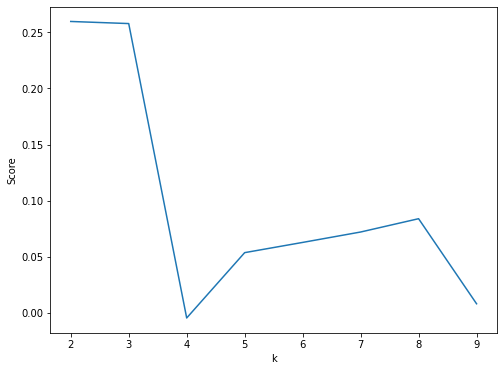

In [0]:
#Visualizing the silhouette scores in a plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,10),silhouette_score)
ax.set_xlabel('k')
ax.set_ylabel('Score')

In [0]:
#re-build the model with k=2
k_means2 = KMeans(featuresCol='features', k=2)
kmeans_model2 = k_means2.fit(sample1)
predictions2 = kmeans_model2.transform(sample1)

In [0]:
predictions2.createOrReplaceTempView("predictions2")

In [0]:
display(predictions2.where(col('prediction')==0).select('image'))

image


In [0]:
display(predictions2.where(col('prediction')==1).select('image'))

image
